In [1]:
%pip install emoji -q

     |████████████████████████████████| 240 kB 7.1 MB/s 


In [2]:
%pip install wordcloud -q

In [3]:
import re
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import emoji
import itertools 
from collections import Counter
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

In [4]:
def date_time(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -'
    result = regex.match(pattern, s)
    if result:
        return True
    return False

def find_author(s):
    s = s.split(":")
    if len(s)==2:
        return True
    else:
        return False

def getDatapoint(line):
    splitline = line.split(' - ')
    dateTime = splitline[0]
    date, time = dateTime.split(", ")
    message = " ".join(splitline[1:])
    if find_author(message):
        splitmessage = message.split(": ")
        author = splitmessage[0]
        message = " ".join(splitmessage[1:])
    else:
        author= None
    return date, time, author, message

In [13]:
import regex

In [14]:
data = []
conversation = "WhatsApp.txt"
with open(conversation, encoding="utf-8") as fp:
    fp.readline()
    messageBuffer = []
    date, time, author = None, None, None
    while True:
        line = fp.readline()
        if not line:
            break
        line = line.strip()
        if date_time(line):
            if len(messageBuffer) > 0:
                data.append([date, time, author, ' '.join(messageBuffer)])
            messageBuffer.clear()
            date, time, author, message = getDatapoint(line)
            messageBuffer.append(message)
        else:
            messageBuffer.append(line)

In [15]:
df = pd.DataFrame(data, columns=["Date", 'Time', 'Author', 'Message'])
df['Date'] = pd.to_datetime(df['Date'])
print(df.tail(20))
print(df.info())
print(df.Author.unique())

          Date     Time             Author  \
587 2022-11-22  5:12 AM               Papa   
588 2022-11-22  5:18 AM               Papa   
589 2022-11-22  5:18 AM               Papa   
590 2022-11-23  1:18 AM               Mama   
591 2022-11-24  7:23 AM               Papa   
592 2022-11-24  7:23 AM               Papa   
593 2022-11-24  7:24 AM               Papa   
594 2022-11-24  7:25 AM               Papa   
595 2022-11-24  7:25 AM               Papa   
596 2022-11-24  7:26 AM               Papa   
597 2022-11-25  7:23 AM               Papa   
598 2022-11-25  7:23 AM               Papa   
599 2022-11-25  7:30 AM               Papa   
600 2022-11-25  7:35 AM               Papa   
601 2022-11-25  7:36 AM               Papa   
602 2022-11-26  7:01 AM    +51 942 441 659   
603 2022-11-26  7:07 AM               None   
604 2022-11-26  8:13 AM               Papa   
605 2022-11-26  4:08 PM  Hector Arquitecto   
606 2022-11-27  6:39 AM               None   

                                 

In [16]:
df['day'] = df['Date'].dt.strftime('%a')
df['month'] = df['Date'].dt.strftime('%b')
df['year'] = df['Date'].dt.year
df['date'] = df['Date'].apply(lambda x: x.date())

In [17]:
df1 = df.copy()      # I will be using a copy of the original data frame everytime, to avoid loss of data!
df1['message_count'] = [1] * df1.shape[0]      # adding extra helper column --> message_count.
df1.drop(columns='year', inplace=True)         # dropping unnecessary columns, using `inplace=True`, since this is copy of the DF and won't affect the original DataFrame.
df1 = df1.groupby('date').sum().reset_index()  # grouping by date; since plot is of frequency of messages --> no. of messages / day.
df1

,date,message_count
0,2022-06-10,4
1,2022-06-12,1
2,2022-06-13,1
3,2022-06-14,5
4,2022-06-15,3
...,...,...
99,2022-11-23,1
100,2022-11-24,6
101,2022-11-25,5
102,2022-11-26,4


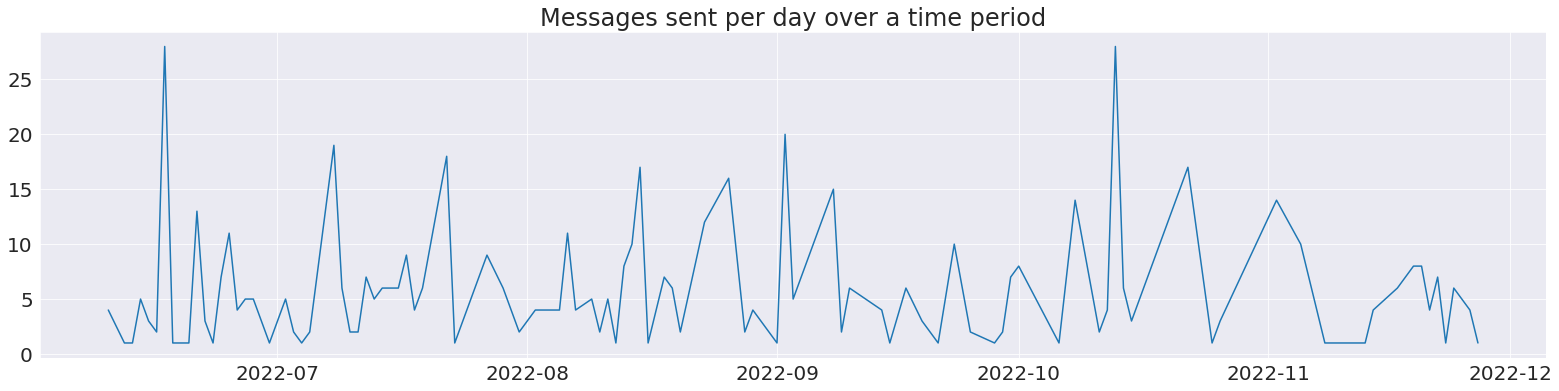

In [18]:
sns.set_style("darkgrid")

# For better readablity;
import matplotlib
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['figure.figsize'] = (27, 6)      # Same as `plt.figure(figsize = (27, 6))`


# A basic plot
plt.plot(df1.date, df1.message_count)
plt.title('Messages sent per day over a time period');

# Could have used Seaborn's lineplot as well.
# sns.lineplot(df1.date, df1.message_count);   


# Saving the plots
plt.savefig('msg_plots.svg', format = 'svg')

In [19]:
top10days = df1.sort_values(by="message_count", ascending=False).head(10)    # Sort values according to the number of messages per day.
top10days.reset_index(inplace=True)           # reset index in order.
top10days.drop(columns="index", inplace=True) # dropping original indices.
top10days

,date,message_count
0,2022-10-13,28
1,2022-06-17,28
2,2022-09-02,20
3,2022-07-08,19
4,2022-07-22,18
5,2022-08-15,17
6,2022-10-22,17
7,2022-08-26,16
8,2022-09-08,15
9,2022-11-02,14


## WhatsApp Data Analysis using Python

### Most Active Days

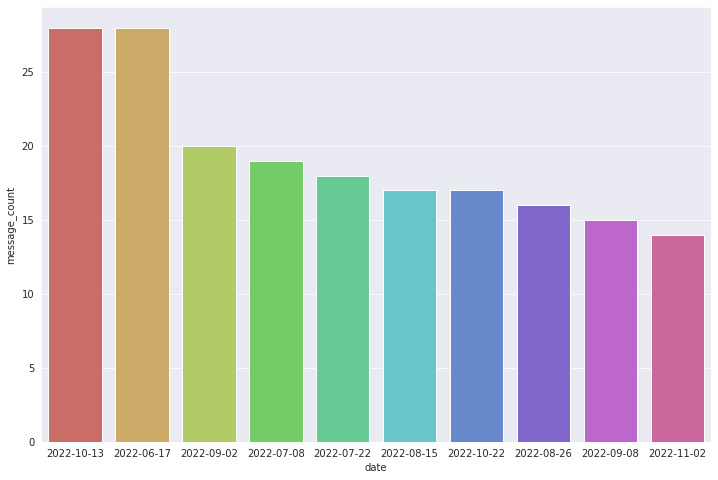

In [20]:
sns.set_style("darkgrid")

# For better readablity;
import matplotlib
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['figure.figsize'] = (12, 8)

# A bar plot for top 10 days
sns.barplot(top10days.date, top10days.message_count, palette="hls");

# Saving the plots
plt.savefig('top10_days.svg', format = 'svg')

### Word Cloud of mostly used word in our Group

In [26]:
stopwords_es = open("stop_words_spanish.txt", "r", encoding="utf8").read()

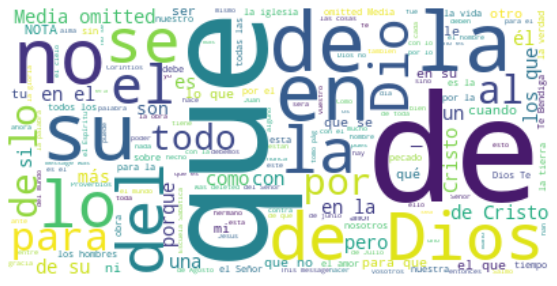

In [28]:
### Word Cloud of mostly used word in our Group
text = " ".join(review for review in df.Message)
wordcloud = WordCloud(stopwords=stopwords_es, background_color="white").generate(text)
  ### Display the generated image:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [29]:
### Creates a list of unique Authors
l = df.Author.unique()
for i in range(len(l)):
  ### Filtering out messages of particular user
  req_df = df[df["Author"] == l[i]]
  ### req_df will contain messages of only one particular user
  print(l[i],'  ->  ',req_df.shape[0])

Papa   ->   417
+51 925 478 313   ->   29
Paola   ->   6
+51 965 666 792   ->   19
Hector Arquitecto   ->   40
None   ->   0
+51 945 866 285   ->   16
+51 916 730 002   ->   1
+51 931 072 643   ->   6
+51 921 909 544   ->   2
Mama   ->   4
Chela   ->   1
Martin   ->   2
+51 942 441 659   ->   10
+51 980 240 074   ->   2
+51 964 752 094   ->   2
+51 970 749 035   ->   2
Jesús Alfredo   ->   1
+51 976 471 275   ->   5
Tio Juan   ->   3
Mili   ->   1
+51 951 065 545   ->   1


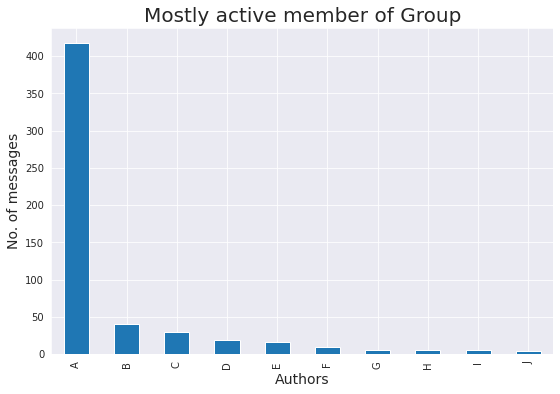

In [30]:
## Mostly Active Author in the Group
plt.figure(figsize=(9,6))
mostly_active = df['Author'].value_counts()
### Top 10 peoples that are mostly active in our Group is : 
m_a = mostly_active.head(10)
bars = ['A','B','C','D','E','F','G','H','I','J']
x_pos = np.arange(len(bars))
m_a.plot.bar()
plt.xlabel('Authors',fontdict={'fontsize': 14,'fontweight': 10})
plt.ylabel('No. of messages',fontdict={'fontsize': 14,'fontweight': 10})
plt.title('Mostly active member of Group',fontdict={'fontsize': 20,'fontweight': 8})
plt.xticks(x_pos, bars)
plt.show()

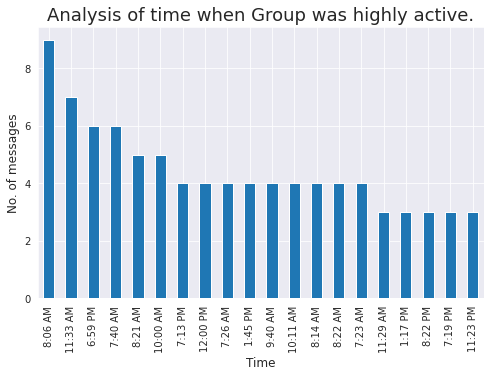

In [31]:
### Time whenever our group is highly active
plt.figure(figsize=(8,5))
t = df['Time'].value_counts().head(20)
tx = t.plot.bar()

plt.xlabel('Time',fontdict={'fontsize': 12,'fontweight': 10})
plt.ylabel('No. of messages',fontdict={'fontsize': 12,'fontweight': 10})
plt.title('Analysis of time when Group was highly active.',fontdict={'fontsize': 18,'fontweight': 8})
plt.show()